In [2]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = ["airplane", "automobile", "bird",
         "cat", "deer", "dog", "frog",
         "horse", "ship", "truck"]

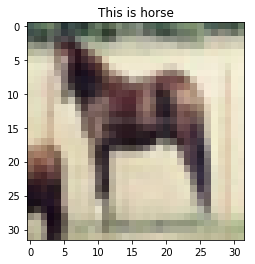

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.title("This is " + trans[y_train[c][0]])
plt.imshow(x_train[c])

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
cnn = Sequential()
# 1792: 3(filter寬) * 3(filter高) * 3(前面一個像素所有值) * 64(個) + 64(bias)
cnn.add(Conv2D(64, (3, 3), 
               padding="same", 
               activation="relu", 
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())
# 73856: 3 * 3 * 64 * 128 + 128
cnn.add(Conv2D(128, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(512, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         


In [0]:
# 資料預處理
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [8]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原本:", y_train[0])
print("後來:", y_train_cat[0])

原本: [6]
後來: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [10]:
cnn.fit(x_train_norm, y_train_cat,
        batch_size=200, 
        epochs=10,
        validation_split=0.1, 
        verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 17s - loss: 1.5689 - acc: 0.4286 - val_loss: 1.2720 - val_acc: 0.5488
Epoch 2/10
 - 9s - loss: 1.1197 - acc: 0.6011 - val_loss: 1.0435 - val_acc: 0.6360
Epoch 3/10
 - 9s - loss: 0.9001 - acc: 0.6828 - val_loss: 0.8347 - val_acc: 0.7118
Epoch 4/10
 - 9s - loss: 0.7745 - acc: 0.7297 - val_loss: 0.7676 - val_acc: 0.7324
Epoch 5/10
 - 9s - loss: 0.6607 - acc: 0.7702 - val_loss: 0.7055 - val_acc: 0.7564
Epoch 6/10
 - 9s - loss: 0.5687 - acc: 0.8015 - val_loss: 0.6779 - val_acc: 0.7656
Epoch 7/10
 - 9s - loss: 0.4920 - acc: 0.8273 - val_loss: 0.6747 - val_acc: 0.7708
Epoch 8/10
 - 9s - loss: 0.4126 - acc: 0.8549 - val_loss: 0.6824 - val_acc: 0.7754
Epoch 9/10
 - 9s - loss: 0.3391 - acc: 0.8824 - val_loss: 0.6944 - val_acc: 0.7804
Epoch 10/10
 - 9s - loss: 0.2722 - acc: 0.9039 - val_loss: 0.7266 - val_acc: 0.7874


In [11]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 2s 152us/step


[0.7784900519371033, 0.7708]

In [12]:
from sklearn.metrics import confusion_matrix
import pandas as pd
base = trans
i = [(str(b) + "(原本)") for b in base]
c = [(str(b) + "(預測)") for b in base]

pre = cnn.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre),
             columns=c,
             index=i)

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(原本),817,11,32,24,16,8,9,13,45,25
automobile(原本),7,840,9,11,6,11,9,3,18,86
bird(原本),50,2,663,63,82,56,40,33,7,4
cat(原本),12,2,58,634,65,146,35,36,1,11
deer(原本),6,1,51,55,770,19,26,64,7,1
dog(原本),5,2,38,175,41,674,15,44,1,5
frog(原本),3,3,33,84,40,19,810,1,3,4
horse(原本),5,1,18,42,46,50,1,833,1,3
ship(原本),43,24,13,25,11,13,11,6,836,18
truck(原本),29,47,9,32,7,11,6,14,14,831


In [13]:
y_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

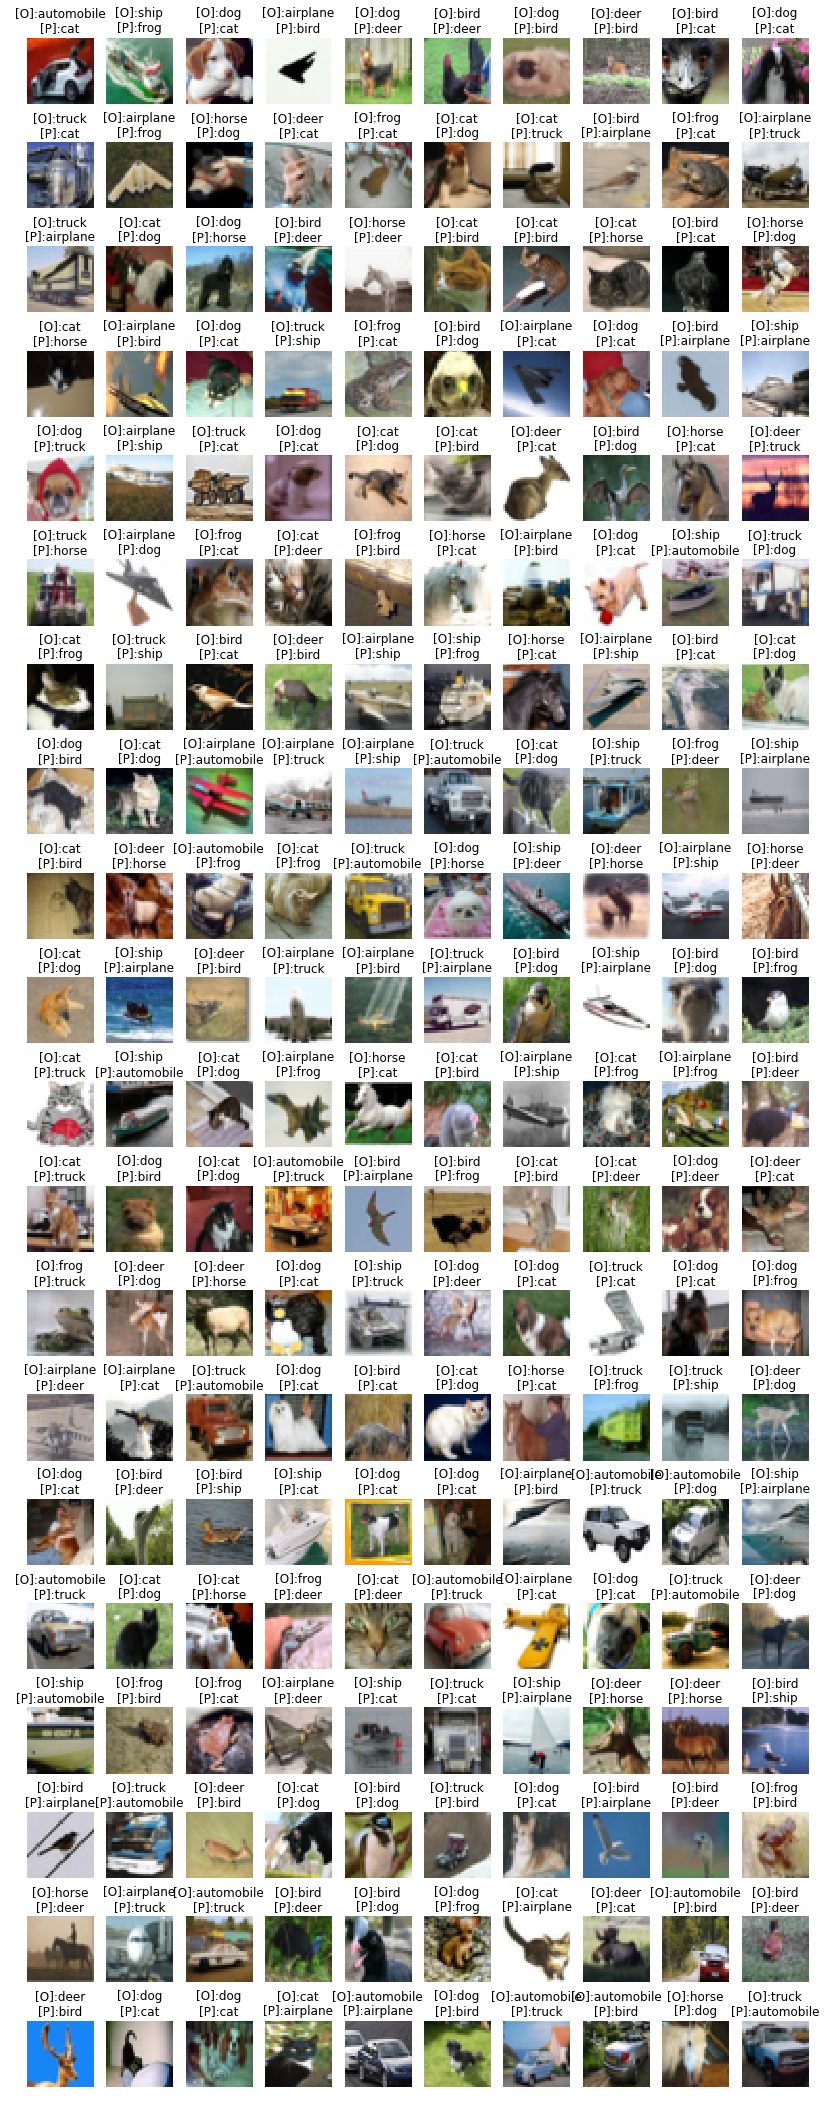

In [14]:
import numpy as np
idx = np.nonzero(pre != y_test.reshape(-1))[0][:200]
# 預測錯誤的圖片
false_img = x_test[idx]
# 預測錯誤圖片的正確答案
false_answer = y_test.reshape(-1)[idx]
# 預測錯誤圖片的預測標籤
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 40))
for i,img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    t = "[O]:" + trans[false_answer[i]] + "\n[P]:" + trans[false_pre[i]]
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)


In [0]:
cnn.save("cnn.h5")

In [16]:
from keras.models import load_model
# 讀取回來: 直接繼續訓練(fit) 預測(predict)
loaded = load_model("cnn.h5")
cnn.evaluate(x_test_norm, y_test_cat)
# 如果你想看儲存的東西長啥樣: 
# https://support.hdfgroup.org/products/java/release/download.html

10000/10000 [==============================] - 2s 181us/step


[0.7784900519371033, 0.7708]